### Test Parseval K-SVD
#### Part1: Learning a K-SVD dictionary for the initial dictionary for Parseval K-SVD

Iteration   2   max error norm is: 1.5886e-12
Iteration   3   max error norm is: 2.1635e-12
Iteration   4   max error norm is: 3.4411e-12
Iteration   5   max error norm is: 1.6479e-12
Iteration   6   max error norm is: 3.0289e-12
Iteration   7   max error norm is: 2.0167e-12
Iteration   8   max error norm is: 1.7e-12
Iteration   9   max error norm is: 1.6207e-12
Iteration   10   max error norm is: 1.2054e-12
Iteration   11   max error norm is: 2.5501e-12
Iteration   12   max error norm is: 1.3303e-12
Iteration   13   max error norm is: 1.8799e-12
Iteration   14   max error norm is: 5.3785e-12
Iteration   15   max error norm is: 2.1868e-12
Iteration   16   max error norm is: 3.0664e-12
Iteration   17   max error norm is: 2.2725e-12
Iteration   18   max error norm is: 2.9873e-12
Iteration   19   max error norm is: 2.4338e-12
Iteration   20   max error norm is: 1.5971e-12
Iteration   21   max error norm is: 2.0007e-12
Iteration   22   max error norm is: 1.7788e-12
Iteration   23   max err

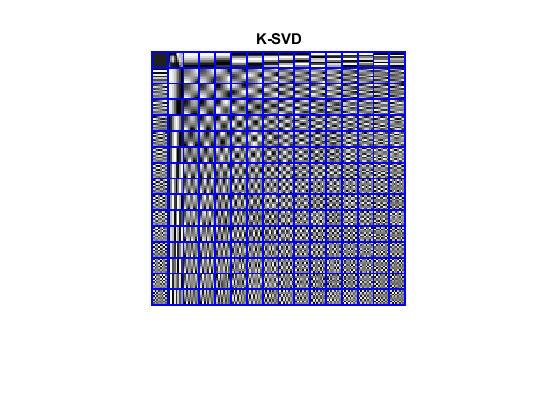

In [1]:
Im = imread('boat256.png');
Im = double(Im);

Im_block_col = im2col(Im, [8,8], 'distinct'); %Im block
Im_block_col_mean = mean(Im_block_col);
Y = Im_block_col - Im_block_col_mean; % E(Yi) = 0, for all i

%K-SVD

%create overcomplete DCT frame
Pn = 16 ;
DCT=zeros(8,Pn);
for k=0:1:Pn-1,
    V=cos([0:1:7]'*k*pi/Pn);
    if k>0, V=V-mean(V); end;
    DCT(:,k+1)=V/norm(V);
end;
DCT=kron(DCT,DCT);

param.K = 256;
param.numIteration = 30;
param.InitializationMethod =  'GivenMatrix';
param.initialDictionary = DCT;
param.displayProgress = 1;
param.preserveDCAtom = 1;
param.L = 64;
param.errorFlag = 0;
param.errorGoal = 1.0e-8;
[D_svd, output] = KSVD(Y, param);
X = full(output.CoefMatrix);

KsvdIm = plot_8by8_frame(D_svd);
figure;
imshow(KsvdIm); title('K-SVD'); %show D_svd element in image

#### Part2: Learning the Parseval K-SVD

Iteration = 1
L=3.333e+08 , obj_rep=39.39     , obj_total=214.2     , con1=950.8     , con2=9.209e-08 
Iteration = 2
L=6.108e+08 , obj_rep=297.4     , obj_total=1546      , con1=933.7     , con2=2.528e-06 
Iteration = 3
L=8.758e+08 , obj_rep=850       , obj_total=4200      , con1=909.5     , con2=2.059e-05 
Iteration = 4
L=1.125e+09 , obj_rep=1685      , obj_total=7979      , con1=881.4     , con2=9.486e-05 
Iteration = 5
L=1.359e+09 , obj_rep=2797      , obj_total=1.293e+04 , con1=852.7     , con2=0.000314  
Iteration = 6
L=1.578e+09 , obj_rep=4186      , obj_total=1.922e+04 , con1=825.6     , con2=0.0008418 
Iteration = 7
L=1.784e+09 , obj_rep=5868      , obj_total=2.71e+04  , con1=801.9     , con2=0.001958  
Iteration = 8
L=1.979e+09 , obj_rep=7894      , obj_total=3.7e+04   , con1=782.4     , con2=0.004129  
Iteration = 9
L=2.167e+09 , obj_rep=1.036e+04 , obj_total=4.943e+04 , con1=767.2     , con2=0.00814   
Iteration = 10
L=2.35e+09  , obj_rep=1.344e+04 , obj_total=6.499e+04 , co

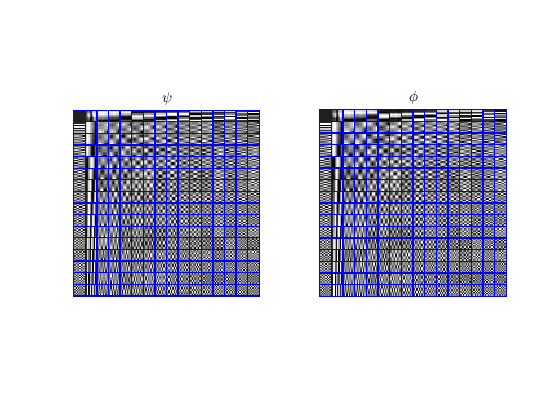

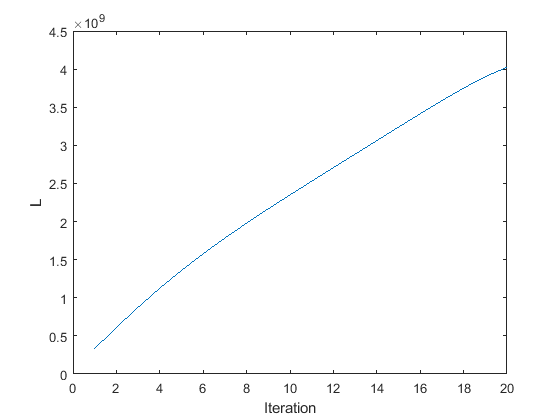

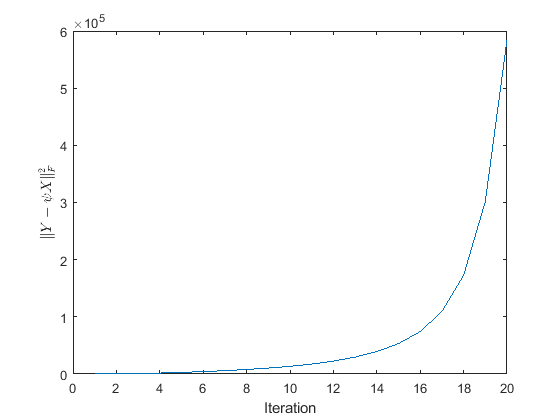

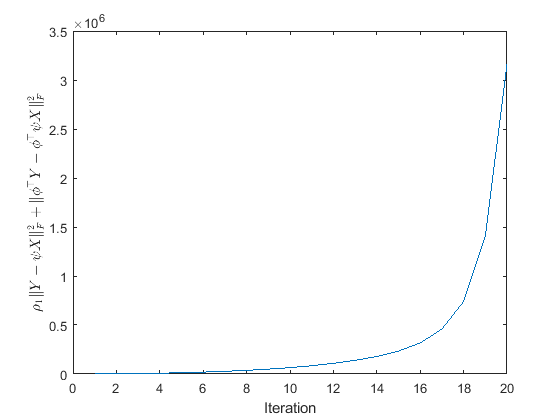

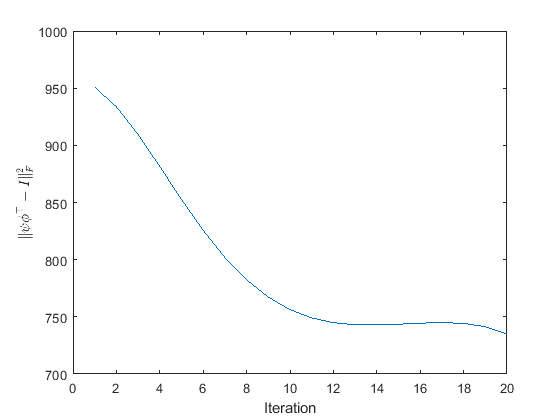

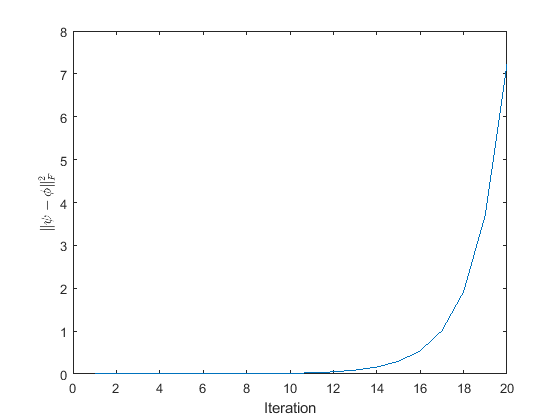

In [2]:
Psi0 = D_svd;
% Phi0 = D_svd + randn(size(D_svd, 1), size(D_svd, 2));
% Phi0 = pinv(D_svd)';
Phi0 = D_svd;

X0 = X;
maxIter = 20;
t = 1.0e-9;
rho = [0.1, 1.0e+5, 1.0e+5];
IsRecord = true;
ShowDetail = true;

[Psi, Phi, X, Record] = ParsevalKSVD(Y, Psi0, Phi0, X0, maxIter, t, rho, IsRecord, ShowDetail);

PsiIm = plot_8by8_frame(Psi); 
PhiIm = plot_8by8_frame(Phi);
figure;
subplot(1, 2, 1); imshow(PsiIm); title('$\psi$','Interpreter','latex');
subplot(1, 2, 2); imshow(PhiIm); title('$\phi$','Interpreter','latex');

%Displaying the curve for the convergent behavior
figure;
plot(Record.augLag); xlabel('Iteration'); ylabel('L');

figure;
plot(Record.obj_rep); xlabel('Iteration'); ylabel('$\| Y - \psi X \|_F^2$', 'Interpreter','latex');

figure;
plot(Record.obj_total); xlabel('Iteration'); ylabel('$\rho_1 \| Y - \psi X \|_F^2 + \| \phi^\top Y -  \phi^\top \psi X \|_F^2$', 'Interpreter','latex');

figure;
plot(Record.con1); xlabel('Iteration'); ylabel('$\| \psi \phi^\top - I \|_F^2$', 'Interpreter','latex');

figure;
plot(Record.con2); xlabel('Iteration'); ylabel('$\| \psi - \phi \|_F^2$', 'Interpreter','latex');

#### Part3: Image Compression
##### PSNR vesus bits per pixel (entropy) 

Processing Parseval K-SVD Dictionary
Computing  Bit 1
Computing  Bit 2
Computing  Bit 3
Computing  Bit 4
Computing  Bit 5
Computing  Bit 6
Computing  Bit 7
Computing  Bit 8
Computing  Bit 9
Computing  Bit 10
Computing  Bit 11
Computing  Bit 12
Computing  Bit 13
Computing  Bit 14
Processing K-SVD Dictionary
Computing  Bit 1
Computing  Bit 2
Computing  Bit 3
Computing  Bit 4
Computing  Bit 5
Computing  Bit 6
Computing  Bit 7
Computing  Bit 8
Computing  Bit 9
Computing  Bit 10
Computing  Bit 11
Computing  Bit 12
Computing  Bit 13
Computing  Bit 14



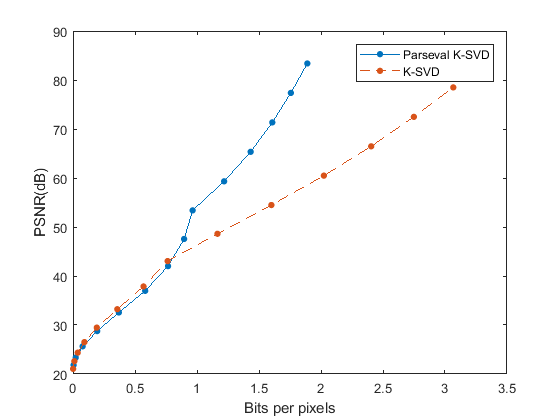

In [3]:
Bits = 1:14;

% The Parseval K-SVD case
E1 = zeros(1, length(Bits)); %bit/per pixel
P1 = zeros(1, length(Bits)); %PSNR

DualPsi = pinv(Psi)';
DualPhi = pinv(Phi)';

disp('Processing Parseval K-SVD Dictionary');
for i = Bits
    % Analysis frame is Psi
    % Synthesis frame is canonical dual frame DualPsi 
    [e, p] = ComputeBPP(i, DualPsi, Psi, Im); 
    E1(i) = e;
    P1(i) = p;
    disp(['Computing  Bit ', num2str(i)]);
end

%bpp is not sorted, so we sorting the bpp.
curve1 = zeros(2, length(Bits));
[sortedE, r]= sort(E1); 
curve1(1,:) = sortedE;
curve1(2,:) = P1(r);

% The K-SVD case
Dual_D_svd = pinv(D_svd)';
E2 = zeros(1, length(Bits)); %bit/per pixel
P2 = zeros(1, length(Bits)); %PSNR
disp('Processing K-SVD Dictionary');
for i = Bits
    [e, p] = ComputeBPP(i, D_svd, Dual_D_svd, Im);

    E2(i) = e;
    P2(i) = p;
    disp(['Computing  Bit ', num2str(i)]);
end

curve2 = zeros(2, length(Bits));
[sortedE, r]= sort(E2); 
curve2(1,:) = sortedE;
curve2(2,:) = P2(r);


figure; 
plot(curve1(1,:), curve1(2,:), 'LineStyle' , '-','Marker', '.', 'MarkerSize', 14);
hold on
plot(curve2(1,:), curve2(2,:), 'LineStyle' , '--', 'Marker', '.', 'MarkerSize', 14);

ylim([20, 90]);
xlabel('Bits per pixels');
ylabel('PSNR(dB)');
legend('Parseval K-SVD', 'K-SVD');